In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All". 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.

/kaggle/input/house-plant-species/house_plant_species/Orchid/208.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/45.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/89.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/212.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/58.JPG
/kaggle/input/house-plant-species/house_plant_species/Orchid/150.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/6.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/109.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/149.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/187.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/76.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/71.JPG
/kaggle/input/house-plant-species/house_plant_species/Orchid/182.jpg
/kaggle/input/house-plant-species/house_plant_species/Orchid/215.jpg
/kaggle/input/house-plant-species/house_p

In [47]:
# Importing the modules
import matplotlib as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import keras
from keras import layers

In [48]:
# Import TensorFlow into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSSSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :()")

TF version:  2.13.0
TF Hub version:  0.14.0
GPU available (YESSSSSS!!!!!!!)


In [49]:
import os

# Define the root directory containing the plant species folders
dataset_dir = '/kaggle/input/house-plant-species/house_plant_species'  # Update this with the actual dataset path

# List of valid image file extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

# List of directories (plant species)
species_dirs = os.listdir(dataset_dir)

# Initialize list to hold image file names and labels
data = []

# Function to check if the file is a valid image
def is_valid_image(file_name):
    return file_name.lower().endswith(valid_extensions)

for species in species_dirs:
    species_dir_path = os.path.join(dataset_dir, species)
    if os.path.isdir(species_dir_path):
        for image_file in os.listdir(species_dir_path):
            if is_valid_image(image_file):
                data.append((image_file, species))  # Append image file name and label (species)
            else:
                print(f"File {image_file} in {species_dir_path} is not a supported image format.")

# Create a DataFrame with image file names and their corresponding labels
df = pd.DataFrame(data, columns=['Image Path', 'Label'])

# Save the DataFrame to a CSV file for later use
df.to_csv('plant_species_labels_filtered.csv', index=False)

File 56.webp in /kaggle/input/house-plant-species/house_plant_species/Orchid is not a supported image format.
File 108.webp in /kaggle/input/house-plant-species/house_plant_species/Chrysanthemum is not a supported image format.
File 122.webp in /kaggle/input/house-plant-species/house_plant_species/Poinsettia (Euphorbia pulcherrima) is not a supported image format.
File 187.webp in /kaggle/input/house-plant-species/house_plant_species/Aloe Vera is not a supported image format.
File 185.jpe in /kaggle/input/house-plant-species/house_plant_species/Aloe Vera is not a supported image format.
File 132.webp in /kaggle/input/house-plant-species/house_plant_species/Aloe Vera is not a supported image format.
File 75.webp in /kaggle/input/house-plant-species/house_plant_species/Aloe Vera is not a supported image format.
File 42.webp in /kaggle/input/house-plant-species/house_plant_species/Aloe Vera is not a supported image format.
File 125.webp in /kaggle/input/house-plant-species/house_plant_spe

In [50]:
df.head()

,Image Path,Label
0,208.jpg,Orchid
1,45.jpg,Orchid
2,89.jpg,Orchid
3,212.jpg,Orchid
4,58.JPG,Orchid


In [51]:
df.tail()

,Image Path,Label
14615,218.jpg,English Ivy (Hedera helix)
14616,213.jpg,English Ivy (Hedera helix)
14617,136.jpg,English Ivy (Hedera helix)
14618,90.jpg,English Ivy (Hedera helix)
14619,147.jpg,English Ivy (Hedera helix)


In [52]:
df.describe

<bound method NDFrame.describe of       Image Path                       Label
0        208.jpg                      Orchid
1         45.jpg                      Orchid
2         89.jpg                      Orchid
3        212.jpg                      Orchid
4         58.JPG                      Orchid
...          ...                         ...
14615    218.jpg  English Ivy (Hedera helix)
14616    213.jpg  English Ivy (Hedera helix)
14617    136.jpg  English Ivy (Hedera helix)
14618     90.jpg  English Ivy (Hedera helix)
14619    147.jpg  English Ivy (Hedera helix)

[14620 rows x 2 columns]>

<Axes: xlabel='Label'>

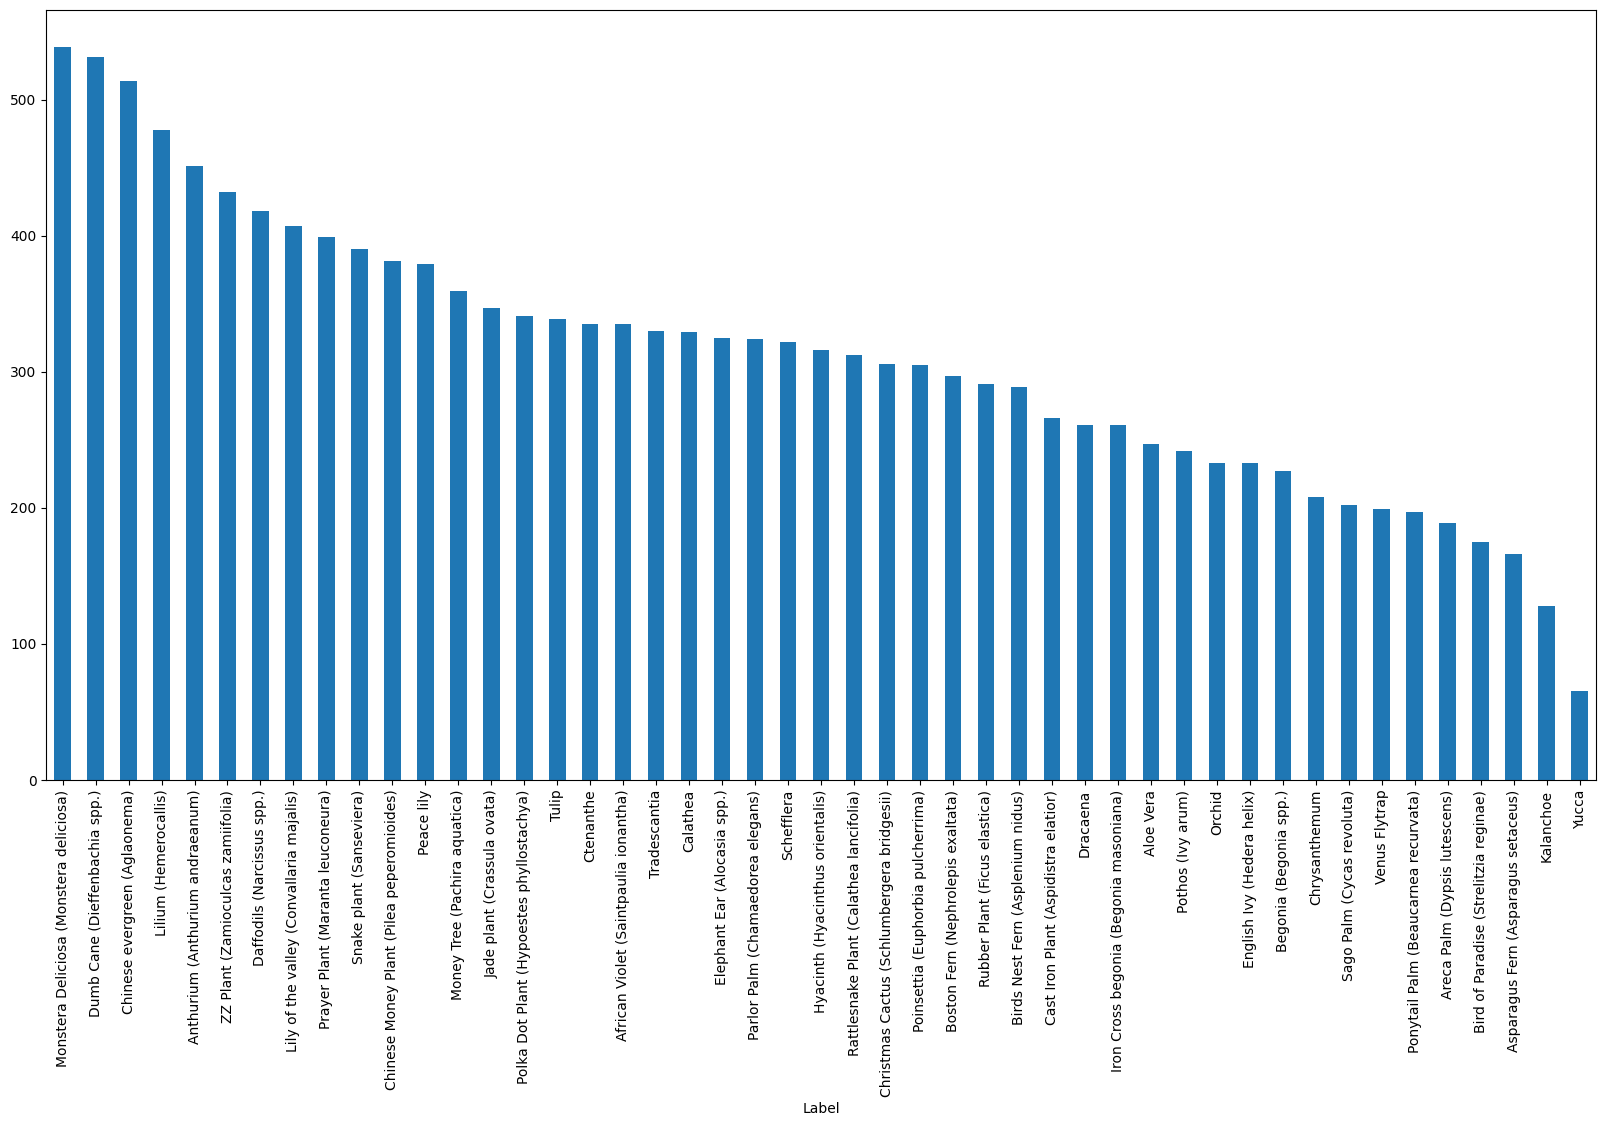

In [53]:
df["Label"].value_counts().plot.bar(figsize=(20, 10))

In [54]:
df["Label"].value_counts().median()

316.0

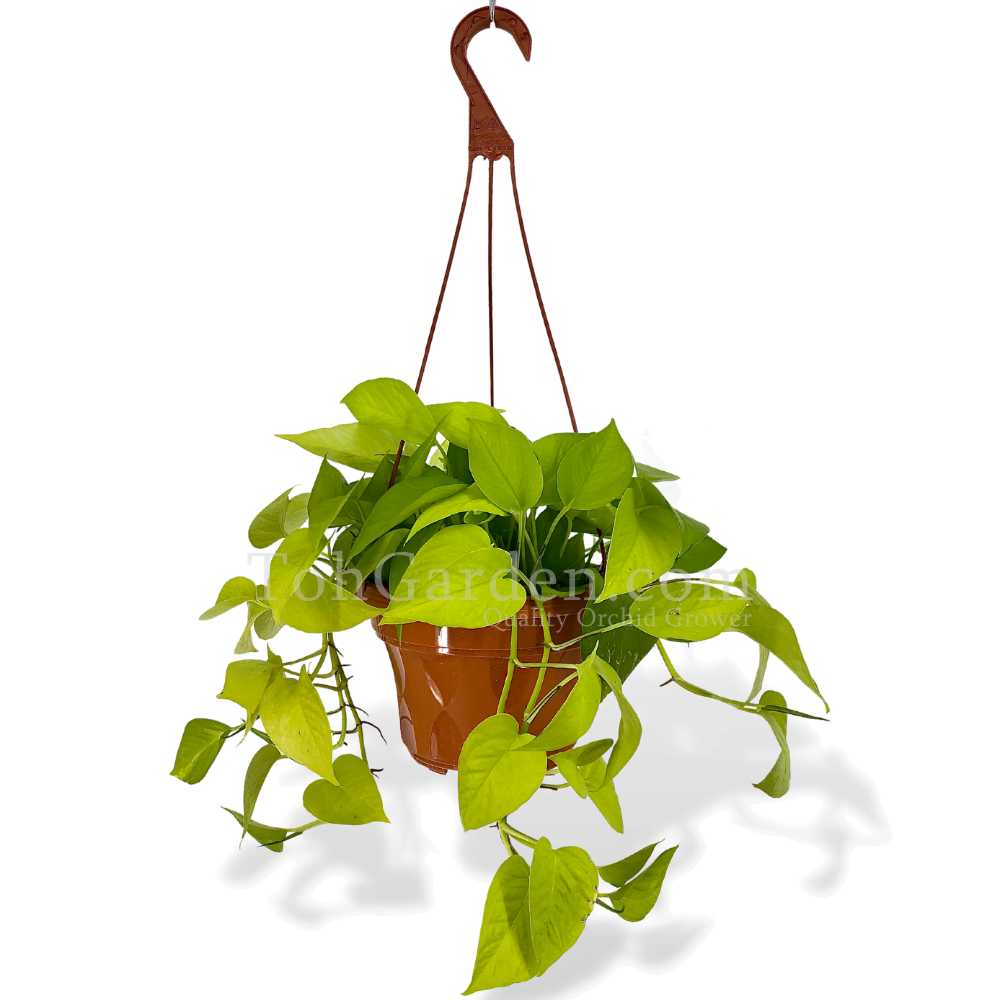

In [55]:
# Let's view  an image
from IPython.display import Image
Image("/kaggle/input/house-plant-species/house_plant_species/Pothos (Ivy arum)/178.png")

In [56]:
# Create path names from image ID's
filenames = df["Image Path"]
filenames[:10]

0    208.jpg
1     45.jpg
2     89.jpg
3    212.jpg
4     58.JPG
5    150.jpg
6      6.jpg
7    109.jpg
8    149.jpg
9    187.jpg
Name: Image Path, dtype: object

In [57]:
len(os.listdir("/kaggle/input/house-plant-species/house_plant_species/"))

47

In [58]:
len(filenames)

14620

In [59]:
# Check whether number of filenames matches number of actual image files
import os
if len(df["Image Path"]) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [60]:
# One more check
Image(filenames[1082])

FileNotFoundError: No such file or directory: '88.jpg'

FileNotFoundError: No such file or directory: '88.jpg'

<IPython.core.display.Image object>

In [61]:
df["Label"][10052]

'ZZ Plant (Zamioculcas zamiifolia)'

In [62]:
import numpy as np
labels = df["Label"].to_numpy()
# labels = np.array(labels) # does same thing as above
labels

array(['Orchid', 'Orchid', 'Orchid', ..., 'English Ivy (Hedera helix)',
       'English Ivy (Hedera helix)', 'English Ivy (Hedera helix)'],
      dtype=object)

In [63]:
len(labels)

14620

In [64]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames!


In [65]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

47

In [66]:
unique_breeds

array(['African Violet (Saintpaulia ionantha)', 'Aloe Vera',
       'Anthurium (Anthurium andraeanum)',
       'Areca Palm (Dypsis lutescens)',
       'Asparagus Fern (Asparagus setaceus)', 'Begonia (Begonia spp.)',
       'Bird of Paradise (Strelitzia reginae)',
       'Birds Nest Fern (Asplenium nidus)',
       'Boston Fern (Nephrolepis exaltata)', 'Calathea',
       'Cast Iron Plant (Aspidistra elatior)',
       'Chinese Money Plant (Pilea peperomioides)',
       'Chinese evergreen (Aglaonema)',
       'Christmas Cactus (Schlumbergera bridgesii)', 'Chrysanthemum',
       'Ctenanthe', 'Daffodils (Narcissus spp.)', 'Dracaena',
       'Dumb Cane (Dieffenbachia spp.)', 'Elephant Ear (Alocasia spp.)',
       'English Ivy (Hedera helix)', 'Hyacinth (Hyacinthus orientalis)',
       'Iron Cross begonia (Begonia masoniana)',
       'Jade plant (Crassula ovata)', 'Kalanchoe',
       'Lilium (Hemerocallis)',
       'Lily of the valley (Convallaria majalis)',
       'Money Tree (Pachira aquatic

In [67]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2] 

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False])]

In [68]:
len(boolean_labels)

14620

In [69]:
# Example turning boolean array into integers
print(labels[0]) # original labels
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample lable occurs

Orchid
(array([29]),)
29
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [70]:
print(labels[2])
print(boolean_labels[2].astype(int))

Orchid
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [71]:
filenames[:10]

0    208.jpg
1     45.jpg
2     89.jpg
3    212.jpg
4     58.JPG
5    150.jpg
6      6.jpg
7    109.jpg
8    149.jpg
9    187.jpg
Name: Image Path, dtype: object

In [72]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False])]

# Creating validation sets

In [73]:
# Setup X & y variables
x = filenames
y = boolean_labels

In [74]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:100000}

In [75]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [76]:
# Let's have a geez at the trainig data
x_train[:5], y_train[:2]

(29      30.jpg
 535    135.jpg
 695     10.jpg
 557     88.jpg
 836    198.jpg
 Name: Image Path, dtype: object,
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False]),
  array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False])])

# Preprocessing the images

In [77]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

FileNotFoundError: [Errno 2] No such file or directory: '178.jpg'

In [ ]:
tf.constant(image)

In [ ]:
image.max(), image.min()

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

# Turning our data into batches

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of above
(process_image(x[42]), tf.constant(y[42]))

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of our data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data nut dosn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))   # Only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

# If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches.....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),    # filepaths
                                                 tf.constant(y)))   # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches......")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data =  data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

In [ ]:
# Check out the different attributes of our batches
train_data.element_spec, val_data.element_spec

# Visualizing our data batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure 
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    #plt.axis("off")

In [ ]:
train_data

In [ ]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels) 

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]   # batch, height, width, colur channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
# Create a funtion which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model 
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),    # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")   # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  ) 

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

# Creating Callbacks

In [ ]:
# Load TendoBoard notebook extension
%load_ext tensorboard

In [ ]:
import os
import tensorflow as tf

def create_tensorboard_callback():
    # Create a directory for logs
    log_dir = "/kaggle/working/logs"
    os.makedirs(log_dir, exist_ok=True)
    
    # Create TensorBoard callback
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# In your model training code
tensorboard = create_tensorboard_callback()

## Early stopping callbacks

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

# Training on subset data

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10} 

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

In [ ]:
# Buils a function to train and return trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

In [ ]:
# Checking tensorboard logs
%tensorboard --logdir log

# Marking and Evaluation of predictions using trained model

In [ ]:
val_data

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
np.sum(predictions[0])

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
unique_breeds[113]

In [ ]:
# Turn predictions probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

  # Get a prediction label based on an array of prediction probabilities
  pred_label = get_pred_label(predictions[81])
  pred_label

In [ ]:
val_data

In [ ]:
# Create a function to unbatch a batch dataset 
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

In [ ]:
get_pred_label(val_labels[0])